# Data preparation

## Scikit learn

### Import

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [108]:
data = pd.read_csv('../data/ML_Houses_dataset.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
features = ['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'Pesos', 'Alley', 'Street', 'WallMat', 'SalePrice']
data = data[features]
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,Concrete,208500
1,1262,3,1,8,3630000.0,NaN,Pave,Wood,181500
2,1786,3,1,5,4470000.0,NaN,Pave,Wood,223500
3,1717,3,1,5,2800000.0,NaN,Pave,Concrete,140000
4,2198,4,1,5,5000000.0,NaN,Pave,Concrete,250000


## Duplicates

In [110]:
len(data)

1760

In [111]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [112]:
data.duplicated().sum()

303

In [113]:
data = data.drop_duplicates()
len(data)

1457

## Missing data

In [114]:
data.isnull().sum().sort_values(ascending=False)

WallMat         1452
Alley           1367
Pesos             10
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
OverallCond        0
Street             0
SalePrice          0
dtype: int64

In [115]:
data.isnull().sum().sort_values(ascending=False)/len(data)

WallMat         0.996568
Alley           0.938229
Pesos           0.006863
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
Street          0.000000
SalePrice       0.000000
dtype: float64

In [116]:
(data.WallMat.isnull().sum()/len(data))*100

99.65682910089224

As 99.66% is missing, we drop the column

In [117]:
data.drop(columns='WallMat', inplace=True) 
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,208500
1,1262,3,1,8,3630000.0,NaN,Pave,181500
2,1786,3,1,5,4470000.0,NaN,Pave,223500
3,1717,3,1,5,2800000.0,NaN,Pave,140000
4,2198,4,1,5,5000000.0,NaN,Pave,250000


In [118]:
import numpy as np

In [119]:
(data.Alley.isnull().sum()/len(data))*100

93.8229238160604

For alley, the NaN means there is no alley

In [120]:
data.Alley.replace(np.nan, "NoAlley", inplace=True)

In [121]:
(data.Pesos.isnull().sum()/len(data))*100

0.6863417982155113

In [122]:
data.dropna(subset=['Pesos'])

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710,3,1,5,4170000.0,NoAlley,Pave,208500
1,1262,3,1,8,3630000.0,NoAlley,Pave,181500
2,1786,3,1,5,4470000.0,NoAlley,Pave,223500
3,1717,3,1,5,2800000.0,NoAlley,Pave,140000
4,2198,4,1,5,5000000.0,NoAlley,Pave,250000
...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,3500000.0,NoAlley,Pave,175000
1456,2073,3,1,6,4200000.0,NoAlley,Pave,210000
1457,2340,4,1,9,5330000.0,NoAlley,Pave,266500
1458,1078,2,1,6,2842500.0,NoAlley,Pave,142125


### SimpleImputer

In [123]:
from sklearn.impute import SimpleImputer

In [124]:
imputer = SimpleImputer(strategy="mean")

In [125]:
imputer.fit(data[['Pesos']]);

In [126]:
data['Pesos'] = imputer.transform(data[['Pesos']])

In [127]:
imputer.statistics_

array([3608796.22667588])

## Outliers

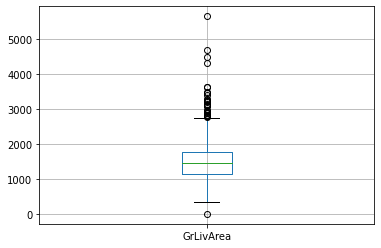

In [128]:
data[['GrLivArea']].boxplot();

In [129]:
data['GrLivArea'].min() 

-1

In [130]:
false_observation = data['GrLivArea'].argmin()
false_observation

10

Get index (above) and drop the row (below)

In [131]:
data = data.drop(false_observation).reset_index(drop=True)

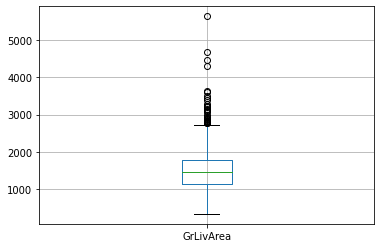

In [132]:
data[['GrLivArea']].boxplot();

### Scaling

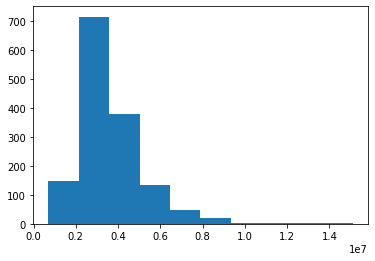

In [133]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(data['Pesos'])

scaler = StandardScaler()

scaler.fit(data[['Pesos']])

data['Pesos'] = scaler.transform(data[['Pesos']])

### Robust Scaling

In [134]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature

data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,0.377941,3,1,5,0.356032,NoAlley,Pave,208500
1,-0.313151,3,1,8,0.013024,NoAlley,Pave,181500
2,0.495179,3,1,5,0.546592,NoAlley,Pave,223500
3,0.388739,3,1,5,-0.514191,NoAlley,Pave,140000
4,1.130737,4,1,5,0.883247,NoAlley,Pave,250000


### One-hot-Encoding

In [135]:
from sklearn.preprocessing import OneHotEncoder

data.Alley.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instantiate encoder

ohe.fit(data[['Alley']]) # Fit encoder

alley_encoded = ohe.transform(data[['Alley']]) # Encode alley

data["Grvl"],data["NoAlley"],data['Pave'] = alley_encoded.T # Transpose encoded Alley back into dataframe

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,Grvl,NoAlley,Pave
0,0.377941,3,1,5,0.356032,NoAlley,Pave,208500,0.0,1.0,0.0
1,-0.313151,3,1,8,0.013024,NoAlley,Pave,181500,0.0,1.0,0.0
2,0.495179,3,1,5,0.546592,NoAlley,Pave,223500,0.0,1.0,0.0
3,0.388739,3,1,5,-0.514191,NoAlley,Pave,140000,0.0,1.0,0.0
4,1.130737,4,1,5,0.883247,NoAlley,Pave,250000,0.0,1.0,0.0


In [136]:
from sklearn.preprocessing import OneHotEncoder

data.Street.unique() # Check unique values for streets (2)

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature

ohe.fit(data[['Street']]) # Fit encoder

data['Street'] = ohe.transform(data[['Street']]) # Encode Street

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,Grvl,NoAlley,Pave
0,0.377941,3,1,5,0.356032,NoAlley,1.0,208500,0.0,1.0,0.0
1,-0.313151,3,1,8,0.013024,NoAlley,1.0,181500,0.0,1.0,0.0
2,0.495179,3,1,5,0.546592,NoAlley,1.0,223500,0.0,1.0,0.0
3,0.388739,3,1,5,-0.514191,NoAlley,1.0,140000,0.0,1.0,0.0
4,1.130737,4,1,5,0.883247,NoAlley,1.0,250000,0.0,1.0,0.0


## Discretize

In [137]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                       bins=[data['SalePrice'].min()-1,
                             data['SalePrice'].mean(),
                             data['SalePrice'].max()+1], 
                       labels=['cheap', 'expensive'])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,Grvl,NoAlley,Pave,SalePriceBinary
0,0.377941,3,1,5,0.356032,NoAlley,1.0,208500,0.0,1.0,0.0,expensive
1,-0.313151,3,1,8,0.013024,NoAlley,1.0,181500,0.0,1.0,0.0,expensive
2,0.495179,3,1,5,0.546592,NoAlley,1.0,223500,0.0,1.0,0.0,expensive
3,0.388739,3,1,5,-0.514191,NoAlley,1.0,140000,0.0,1.0,0.0,cheap
4,1.130737,4,1,5,0.883247,NoAlley,1.0,250000,0.0,1.0,0.0,expensive


## Feature Selection

### Feature correlation

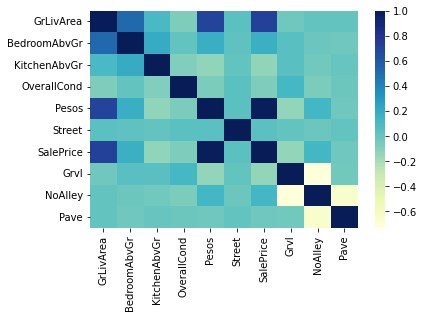

In [138]:
import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

In [139]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
46,Pesos,SalePrice,0.990353
64,SalePrice,Pesos,0.990353
6,GrLivArea,SalePrice,0.708652
60,SalePrice,GrLivArea,0.708652
40,Pesos,GrLivArea,0.707766


In [141]:
data.drop(columns=['Pesos'], inplace=True)

## Modelling

In [142]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

target_encoder = LabelEncoder().fit(data['SalePriceBinary']) # Fit target encoder

y = target_encoder.transform(data['SalePriceBinary']) # Encode target

X = data.drop(columns=['Alley', 'SalePrice', 'SalePriceBinary'])# Create feature set

X_scaled = MinMaxScaler().fit_transform(X) # Scale the features

log_reg = LogisticRegression(max_iter=1000) # Instanciate model

scores = cross_val_score(log_reg, X_scaled, y, cv=10) # Cross validate

scores.mean()

0.814478034955125

## Feature Permutation

In [143]:
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,0.311195
1,BedroomAbvGr,0.03544
2,KitchenAbvGr,0.01875
6,NoAlley,0.008791
5,Grvl,0.004464
3,OverallCond,0.001099
7,Pave,0.000275
4,Street,0.000069


In [144]:
X = X.drop(columns=['Street', "Pave"]) # Drops weak features

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=10)

scores.mean()

0.8433679735474728